In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from pandas_profiling import ProfileReport

In [98]:
directorio ="/home/nataly/Documentos/mineria/datos/"
archi = 'Position_Salaries.csv'
file=directorio+archi

df = pd.read_csv(file)
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [100]:
x = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values
print(x)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [101]:
y = y.reshape(len(y),1)
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

In [102]:
X = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values
y = y.reshape(len(y),1)

# Estandarización de la información 

In [103]:
sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X)
Y = sc_y.fit_transform(y)

X
Y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

# Tunear hiperparametros

In [61]:
regr_poly = svm.SVR(kernel='poly',C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)
regr_line = svm.SVR(kernel='linear', C=100, gamma='auto')
regr_rbf = svm.SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)

regr_poly.fit(X.reshape(-1, 1), Y)
regr_line.fit(X.reshape(-1, 1), Y)
regr_rbf.fit(X.reshape(-1, 1), Y) 

/home/nataly/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/nataly/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/nataly/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR(C=100, gamma=0.1)

## Predicción de cada uno de los kernes fitiados

In [62]:
regr_line.predict([[6.5]])

array([2.58544127])

In [63]:
regr_poly.predict([[6.5]])

array([122.15891184])

In [64]:
regr_rbf.predict([[6.5]])

array([3.98332022])

# Filtrar Parametros

In [73]:
ypred_rbf    = regr_rbf.predict(X.reshape(-1, 1))
val_pred_rbf = sc_X.inverse_transform(ypred_rbf)

In [75]:
ypred_line    = regr_line.predict(X.reshape(-1, 1))
val_pred_line      = sc_X.inverse_transform(ypred_line)

In [74]:
ypred_poly    = regr_poly.predict(X.reshape(-1, 1))
val_pred_poly = sc_X.inverse_transform(ypred_poly)

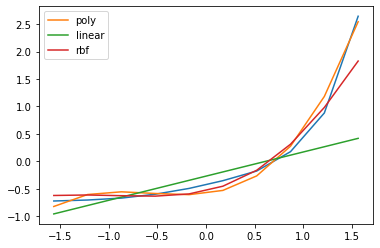

In [118]:
plt.plot(X, Y)
plt.plot(X, regr_poly.predict(X.reshape(-1, 1)), label='poly')
plt.plot(X, regr_line.predict(X.reshape(-1, 1)), label='linear')
plt.plot(X, regr_rbf.predict(X.reshape(-1, 1)), label='rbf')

plt.legend();

# SVR Lineal

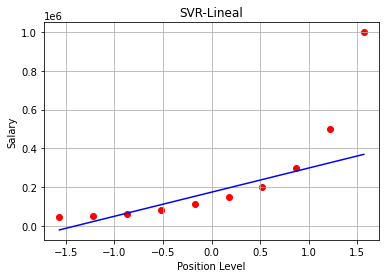

In [76]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(Y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regr_line.predict(X)), color = 'blue')
plt.title('SVR-Lineal')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.grid()
plt.show()

In [77]:
from sklearn.metrics import r2_score

In [78]:
r2_score(Y, ypred_line)

0.45378134793310465

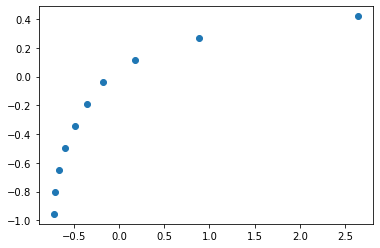

In [82]:
plt.scatter(Y, regr_line.predict(X.reshape(-1, 1)))

# SVR rbf

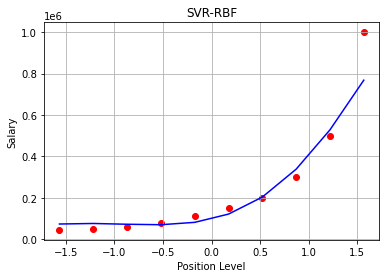

In [84]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(Y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regr_rbf.predict(X)), color = 'blue')
plt.title('SVR-RBF')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.grid()
plt.show()

In [79]:
r2_score(Y, ypred_rbf)

0.9264779133603929

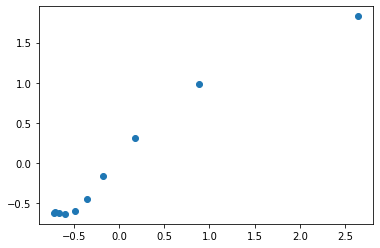

In [85]:
plt.scatter(Y, regr_rbf.predict(X.reshape(-1, 1)))

In [28]:
#supongamos que hay un argumento de 6,5 millones
#regressor.predict([[6.5]])
#realizamos la transformación inversa. - 
#sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))

# SVR polinomial

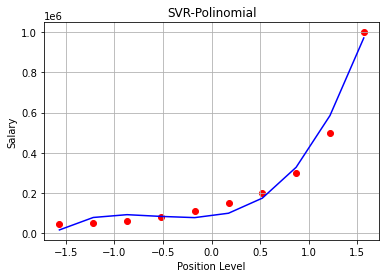

In [88]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(Y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regr_poly.predict(X)), color = 'blue')
plt.title('SVR-Polinomial')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.grid()
plt.show()

In [80]:
r2_score(Y, ypred_poly)

0.9804167593469364

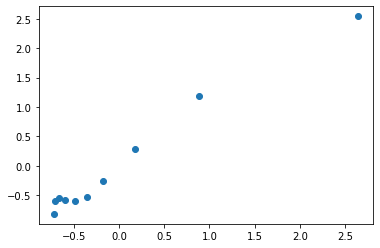

In [87]:
plt.scatter(Y, regr_poly.predict(X.reshape(-1, 1)))

En cada gráfica donde fijamos el Kernel y ajuste de cada parámetro al momento de analizar, los comportamiento de las función y el r²=98% de precisión y se llega a la conclusión de que  la función ajustada a el kernel polinomial está haciendo un mejor acercamiento al nivel de los comportamiento de los datos.

Probaremos una modelo basado en árboles de decisión para mejorar mejorar la precisión en la predicción por lo menos un 0.01%

# Árboles de decisión para predicción de valores

In [121]:
regressor = DecisionTreeRegressor(criterion='mae', max_features='log2',random_state = 0)
regressor.fit(X, Y)

DecisionTreeRegressor(criterion='mae', max_features='log2', random_state=0)

In [122]:
regressor.predict([[6.5]])

array([2.64250325])

In [123]:
ypred    = regressor.predict(X.reshape(-1, 1))
val_pred = sc_X.inverse_transform(ypred)

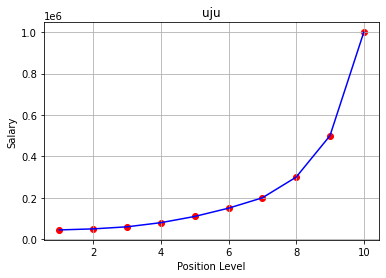

In [124]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(Y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)), color = 'blue')
plt.title('uju')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.grid()
plt.show()

In [125]:
r2_score(Y, ypred)

1.0

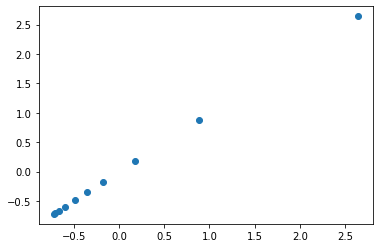

In [126]:
plt.scatter(Y, ypred)

se obtuvo un sobre entrenamiento del modelo, no se logró mejorar la predicción, podemos concluir que el mínimo modelo viable a usar para esta solución es SVR-Polinomial